In [4]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt




In [5]:
Fertilizer = np.arange(100, 800, 100)
Rainfall   = [10, 20, 10, 30, 20, 20, 30]
Yield      = [40, 50, 50, 70, 65, 65, 80]



df2 = pd.DataFrame(
 {
   "Fertilizer": Fertilizer
 , "Rainfall": Rainfall
 , "Yield": Yield
 }
 )

print(df2)

   Fertilizer  Rainfall  Yield
0         100        10     40
1         200        20     50
2         300        10     50
3         400        30     70
4         500        20     65
5         600        20     65
6         700        30     80


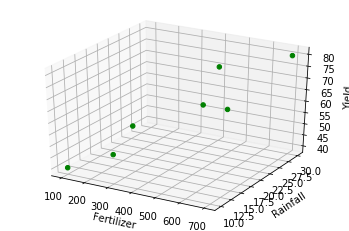

In [6]:

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(
  df2["Fertilizer"]
, df2["Rainfall"]
, df2["Yield"]
, color = "green"
, marker = "o"
, alpha  = 1
)
ax.set_xlabel("Fertilizer")
ax.set_ylabel("Rainfall")
ax.set_zlabel("Yield")
plt.show()

In [7]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
Reg2 = ols(formula = "Yield ~ Fertilizer + Rainfall", data = df2)
Fit2 = Reg2.fit()
print(Fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     105.3
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           0.000347
Time:                        10:19:07   Log-Likelihood:                -13.848
No. Observations:                   7   AIC:                             33.70
Df Residuals:                       4   BIC:                             33.53
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.0952      2.491     11.277      0.0

C:\Users\iteofil1\.conda\envs\launchpad\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [8]:
print(Fit2.params)

Intercept     28.095238
Fertilizer     0.038095
Rainfall       0.833333
dtype: float64


In [9]:
print(Fit2.fittedvalues)

0    40.238095
1    52.380952
2    47.857143
3    68.333333
4    63.809524
5    67.619048
6    79.761905
dtype: float64


In [10]:
print(Fit2.resid)

0   -0.238095
1   -2.380952
2    2.142857
3    1.666667
4    1.190476
5   -2.619048
6    0.238095
dtype: float64


In [11]:
print(Fit2.bse)

Intercept     2.491482
Fertilizer    0.005832
Rainfall      0.154303
dtype: float64


In [12]:
print(Fit2.centered_tss)

1150.0


In [13]:
print(anova_lm(Fit2))

             df      sum_sq     mean_sq           F    PR(>F)
Fertilizer  1.0  972.321429  972.321429  181.500000  0.000176
Rainfall    1.0  156.250000  156.250000   29.166667  0.005690
Residual    4.0   21.428571    5.357143         NaN       NaN


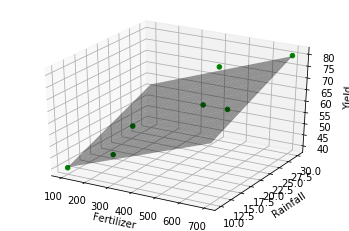

In [14]:
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(
  df2["Fertilizer"]
, df2["Rainfall"]
, df2["Yield"]
, color = "green"
, marker = "o"
, alpha  = 1
)
ax.set_xlabel("Fertilizer")
ax.set_ylabel("Rainfall")
ax.set_zlabel("Yield")
x_surf = np.arange(100, 720, 20)
y_surf = np.arange(10, 32, 2)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({
   "Fertilizer": x_surf.ravel()
 , "Rainfall": y_surf.ravel()
 })
out = Fit2.predict(exog = exog)
ax.plot_surface(
           x_surf
         , y_surf
         , out.values.reshape(x_surf.shape)
         , rstride=1
         , cstride=1
         , color="None"
         , alpha = 0.4
         )
plt.show()